In [1]:
import sys
import os
import numpy as np

project_root = os.path.abspath("..")  # If notebooks is one folder above src
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import torch
from src.energy.GMM import GaussianMixture

In [16]:
weights = torch.tensor([0.5, 0.4, 0.1])
means = torch.tensor([[5, 5], [-2, 5], [-2,-2]], dtype=torch.float32)
covs = torch.tensor([[[1, 0], [0, 1]], [[1,0],[0,1]], [[1, 0], [0, 1]]], dtype=torch.float32)

In [17]:
td = GaussianMixture(weights, means, covs)

In [18]:
samples = td.exact_sample(1000)

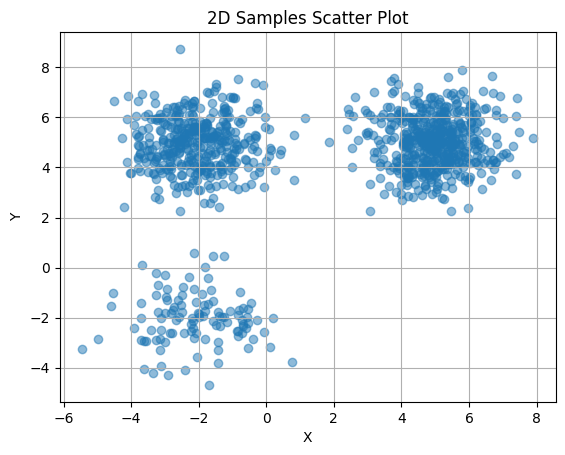

In [19]:
import matplotlib.pyplot as plt

def plot_2d_samples(samples):
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Samples Scatter Plot')
    plt.grid(True)
    plt.show()

# Example usage
plot_2d_samples(samples)

In [20]:
td.forward(samples[:10])

tensor([2.7886, 2.6522, 2.9625, 6.3358, 4.6818, 2.8561, 3.1439, 2.8534, 2.8488,
        2.5471])

In [21]:
td.grad(samples[:1])

tensor([[0.4927, 0.5220]])

In [22]:
td.grad(samples[:10])

tensor([[ 0.4927,  0.5220],
        [ 0.4765, -0.1234],
        [-0.2773,  0.5830],
        [ 0.4631, -2.7194],
        [-0.8868,  1.8749],
        [-0.8004, -0.0973],
        [ 0.6657,  0.8847],
        [-0.3198, -0.3102],
        [ 0.7940, -0.0719],
        [ 0.1781, -0.0192]])

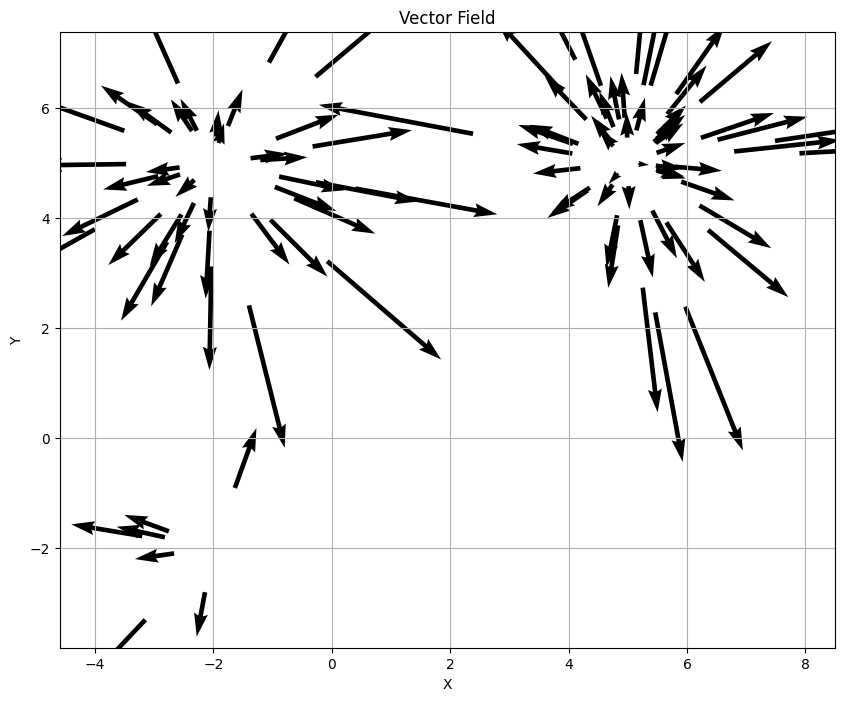

In [23]:
def plot_vector_field(samples, vectors):
    plt.figure(figsize=(10, 8))
    plt.quiver(samples[:, 0], samples[:, 1], vectors[:, 0], vectors[:, 1], angles='xy', scale_units='xy', scale=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Vector Field')
    plt.grid(True)
    plt.show()

n=100
plot_vector_field(samples[:n], td.grad(samples[:n]))

In [24]:
# Checking if two procedures are equivalent
# Generate a random tensor of size 10 x 2
random_samples = torch.randn(10, 2)

# Evaluate gradients using td.grad function
grad_td = td.grad(random_samples)

# Evaluate gradients using torch.autograd.grad function
random_samples.requires_grad_(True)
output = td.forward(random_samples)
grad_autograd = torch.autograd.grad(outputs=output, inputs=random_samples, grad_outputs=torch.ones_like(output))[0]

# Compare the gradients
print("Gradients using td.grad function:\n", grad_td)
print("Gradients using torch.autograd.grad function:\n", grad_autograd)
print("Difference between the gradients:\n", grad_td - grad_autograd)

Gradients using td.grad function:
 tensor([[2.6823, 1.7844],
        [3.5025, 2.2070],
        [2.9374, 2.0507],
        [3.6522, 0.7521],
        [2.1621, 2.1957],
        [2.9447, 1.5015],
        [3.0000, 1.5754],
        [2.2321, 1.1554],
        [1.8099, 1.9251],
        [2.6646, 1.0213]])
Gradients using torch.autograd.grad function:
 tensor([[2.6823, 1.7844],
        [3.5025, 2.2070],
        [2.9374, 2.0507],
        [3.6522, 0.7521],
        [2.1621, 2.1957],
        [2.9447, 1.5015],
        [3.0000, 1.5754],
        [2.2321, 1.1554],
        [1.8099, 1.9251],
        [2.6646, 1.0213]])
Difference between the gradients:
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


In [25]:
def ftest(x):
    return (x**2).sum(axis=-1)
# Checking if two procedures are equivalent
# Generate a random tensor of size 10 x 2
torch.random.manual_seed(0)
random_samples = torch.randn(3, 2)
print(random_samples)

# Evaluate gradients using td.grad function
random_samples.requires_grad_(True)
out = ftest(random_samples)
grad_vec = torch.ones_like(out)
grad_vec2 = torch.zeros_like(out)
print(out)
grad_vec2[0] = 1    
out.backward(grad_vec2)
print(random_samples.grad)
print("True gradients of ftest:\n", 2*random_samples)


tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684],
        [-1.0845, -1.3986]])
tensor([2.4608, 5.0702, 3.1323], grad_fn=<SumBackward1>)
tensor([[ 3.0820, -0.5869],
        [-0.0000,  0.0000],
        [-0.0000, -0.0000]])
True gradients of ftest:
 tensor([[ 3.0820, -0.5869],
        [-4.3576,  1.1369],
        [-2.1690, -2.7972]], grad_fn=<MulBackward0>)


In [26]:
def ftest2(x):
    return (x**2)
# Checking if two procedures are equivalent
# Generate a random tensor of size 10 x 2
torch.random.manual_seed(0)
random_samples = torch.randn(3, 2)
print(random_samples)

# Evaluate gradients using td.grad function
random_samples.requires_grad_(True)
out = ftest2(random_samples)
print(out)
grad_vec = torch.ones_like(out)
print(grad_vec)
out.backward(grad_vec)
print(random_samples.grad)


tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684],
        [-1.0845, -1.3986]])
tensor([[2.3747, 0.0861],
        [4.7471, 0.3231],
        [1.1762, 1.9561]], grad_fn=<PowBackward0>)
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[ 3.0820, -0.5869],
        [-4.3576,  1.1369],
        [-2.1690, -2.7972]])


In [27]:
from torch.autograd import Variable
import torch
x = Variable(torch.FloatTensor([[1, 2, 3, 4]]), requires_grad=True)
z = 2*x
z[0, 0] += x[0, 1]
loss = z.sum(dim=1)

# do backward for first element of z
z.backward(torch.FloatTensor([[1, 0, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_() #remove gradient in x.grad, or it will be accumulated

# do backward for second element of z
z.backward(torch.FloatTensor([[0, 1, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# do backward for all elements of z, with weight equal to the derivative of
# loss w.r.t z_1, z_2, z_3 and z_4
z.backward(torch.FloatTensor([[1, 1, 1, 1]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# or we can directly backprop using loss
loss.backward() # equivalent to loss.backward(torch.FloatTensor([1.0]))
print(x.grad.data)

tensor([[2., 1., 0., 0.]])
tensor([[0., 2., 0., 0.]])
tensor([[2., 3., 2., 2.]])
tensor([[2., 3., 2., 2.]])
